In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import random
from sklearn import metrics
import matplotlib.colors as colors
import math

In [ ]:
# KNN Classifier : 

In [ ]:
def train_test_split(data, split):
  x_train_data = []
  y_train_data = []
  x_test_data = []
  y_test_data = []
  n = len(data)
  train_size = int(n*split)
  test_size = n - train_size

  random_indices = random.sample(range(0, n), train_size)
  for i in range(0, len(random_indices)):
    x_train_data.append(list(data.iloc[random_indices[i]][:-1]))
    y_train_data.append(data.iloc[random_indices[i]][-1:].iloc[0])

  for i in range(0, n):
    if i not in random_indices:
      x_test_data.append(list(data.iloc[i][:-1]))
      y_test_data.append(data.iloc[i][-1:].iloc[0])

  return x_train_data,y_train_data,x_test_data,y_test_data

In [ ]:
knn_data2 = pd.read_csv('drive/MyDrive/part2/train_45.csv')

In [ ]:
x_train, y_train, x_validation, y_validation = train_test_split(knn_data2, 0.95)

In [ ]:
k = [1, 3, 5, 7, 9, 11, 13, 15, 17]

In [ ]:
def get_distances(x, x_train):
  res = []
  for i in range(0, len(x_train)):
    temp = x_train[i]
    dist = math.sqrt(pow(x[0]-temp[0], 2) + pow(x[1]-temp[1], 2))
    res.append(dist)

  return res

In [ ]:
def accuracy_knn(y_pred, y_train):
  cnt = 0 
  for i in range(0, len(y_pred)):
    if y_pred[i]==y_train[i]:
      cnt+=1

  return (cnt/len(y_pred))*100

In [ ]:
def predict_knn(x_test, x_train, y_train, k):
    distances = get_distances(x_test, x_train)
    k_indices = np.argsort(distances)[:k]
    k_nearest_labels = [y_train[l] for l in k_indices]
    dict = {}
    for label in k_nearest_labels:
      if label in dict:
        dict[label] += 1
      
      else:
        dict[label] = 1

    max1 = 0 
    most_common = -1
    for key in dict:
      if dict[key] > max1:
        max1 = dict[key]
        most_common = key

    return most_common

In [ ]:
accuracy = []
for j in range(0, len(k)):
  y_pred = []
  for i in range(0, len(x_validation)):
    y_pred.append(predict_knn(x_validation[i], x_train, y_train, k[j]))
  
  accuracy.append(accuracy_knn(y_pred, y_validation))

In [ ]:
print(accuracy)

[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]


Optimal Value of k is 1

In [ ]:
knn_testing2 = pd.read_csv('drive/MyDrive/part2/test_45.csv')

In [ ]:
x_test = []
y_test = []
for i in range(0, len(knn_testing2)):
  temp = []
  temp.append(knn_testing2.iloc[i].x)
  temp.append(knn_testing2.iloc[i].y)
  x_test.append(temp)
  y_test.append(knn_testing2.iloc[i].label)

In [ ]:
def confusion_matrix_plot(y_pred, y_actual):
  confusion_matrix = metrics.confusion_matrix(y_pred, y_actual)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
  cm_display.plot()
  plt.show()

Accuracy on Test Data :  100.0


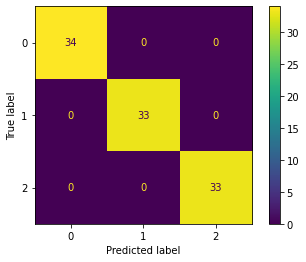

In [ ]:
y_predicted = []
for i in range(0, len(x_test)):
  y_predicted.append(predict_knn(x_test[i], x_train, y_train, 1))
print("Accuracy on Test Data : ", accuracy_knn(y_predicted, y_test))
confusion_matrix_plot(y_predicted, y_test)

In [ ]:
def plot_classification_boundary_knn(test, x_train, y_train, classes, k):
  x = list(test.x)
  y = list(test.y)
  if(classes==3):
    colors_scatter = ['green', 'red', 'purple']

  else:
    colors_scatter = ["green", "red"]
  cmap = plt.cm.colors.ListedColormap(colors_scatter)
  N = 100
  X = np.linspace(min(x), max(x), N)
  Y = np.linspace(min(y), max(y), N)
  X, Y = np.meshgrid(X, Y)
  zz = np.array([predict_knn(np.array([xx, yy]), x_train, y_train, k) for xx,yy in zip(np.ravel(X), np.ravel(Y))])
  Z = zz.reshape(X.shape)

  plt.figure(figsize=(12,8))

  # Create the scatter plot with different colors for each class
  plt.scatter(x, y, c=y_test, cmap=cmap)
  plt.contourf( X, Y, Z, 2, alpha = .1, colors = colors_scatter)
  plt.contour( X, Y, Z, 2, alpha = 1, colors = colors_scatter)


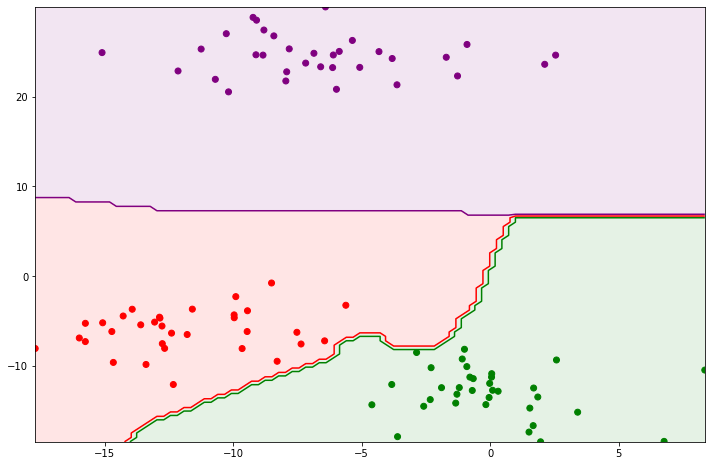

In [ ]:
plot_classification_boundary_knn(knn_testing2, x_train, y_train, 3, 1)

In [ ]:
# Dataset 3 : 

In [ ]:
knn_data3 = pd.read_csv('drive/MyDrive/part3/train_45.csv')

In [ ]:
x_train, y_train, x_validation, y_validation = train_test_split(knn_data3, 0.95)

In [ ]:
accuracy = []
for j in range(0, len(k)):
  y_pred = []
  for i in range(0, len(x_validation)):
    y_pred.append(predict_knn(x_validation[i], x_train, y_train, k[j]))
  
  accuracy.append(accuracy_knn(y_pred, y_validation))
print(accuracy)

[96.0, 96.0, 96.0, 96.0, 96.0, 96.0, 96.0, 96.0, 96.0]


Optimal Value of k is 1

In [ ]:
knn_testing3 = pd.read_csv('drive/MyDrive/part3/test_45.csv')

In [ ]:
x_test = []
y_test = []
for i in range(0, len(knn_testing3)):
  temp = []
  temp.append(knn_testing3.iloc[i].x)
  temp.append(knn_testing3.iloc[i].y)
  x_test.append(temp)
  y_test.append(knn_testing3.iloc[i].label)

Accuracy on Test Data :  94.0


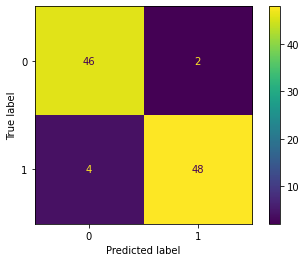

In [ ]:
y_predicted = []
for i in range(0, len(x_test)):
  y_predicted.append(predict_knn(x_test[i], x_train, y_train, 1))
print("Accuracy on Test Data : ", accuracy_knn(y_predicted, y_test))
confusion_matrix_plot(y_predicted, y_test)

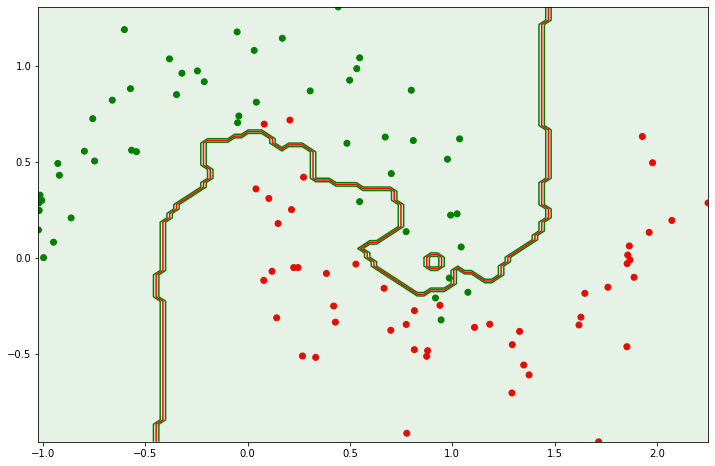

In [ ]:
plot_classification_boundary_knn(knn_testing3, x_train, y_train, 2, 1)